## Data viz with 3D charts
$$ f(x,y) = \frac{1}{ r + 1}$$

where $r$ is $3^{-x^2 - y^2}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #
from sympy import symbols, diff
from math import log


In [3]:
def f(x,y): 
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)


In [4]:
#make our x and y 
x = np.linspace(-2 , 2, 200)
y = np.linspace(-2 , 2, 200)

#making x and y 2D
x , y = np.meshgrid(x,y)

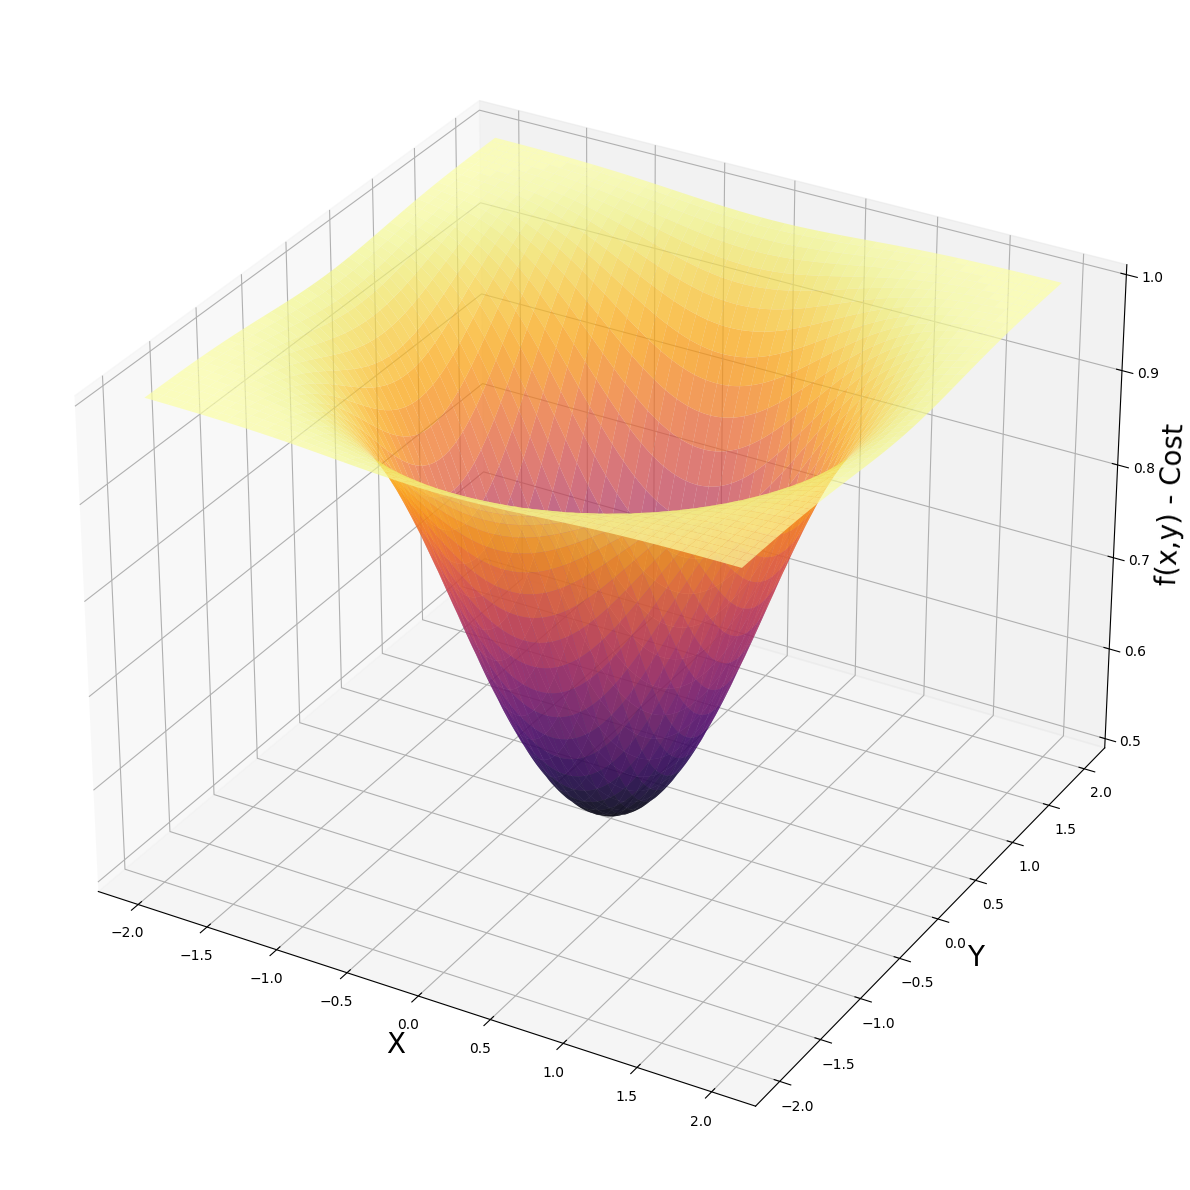

In [5]:
fig = plt.figure(figsize=(16, 12))
plt.axes(projection='3d')
ax = plt.gca()

ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x,y) - Cost", fontsize = 20)       

#
ax.plot_surface(x,y,f(x,y), cmap= cm.inferno, alpha=0.7)
plt.tight_layout()
plt.show()

## Partial Derivatives and Symbolic Computation
### $$ \frac{\partial f}{\partial x} = \frac{2x \ln(3)   \cdot 3^{-x^2 - y^2}} {\left(3^{-x^2 - y^2} + 1\right)^2} $$

### $$ \frac{\partial f}{\partial y} = \frac{2y \ln(3)   \cdot 3^{-x^2 - y^2}} {\left(3^{-x^2 - y^2} + 1\right)^2} $$

In [6]:
a , b = symbols('x, y')
print('Cost-Function: ',f(a, b))
print("partial Derivative, with respect to x: ", diff(f(a,b) ,a))

result = f(a,b).evalf(subs = {a:1.8, b:1.0})
print('the value of f(x,y) at x = 1.8, y = 1.0 is', result)

print("Slope of the Cost-Function: ",diff(f(a,b), a).evalf(subs={a:1.8,b:1.0}))


Cost-Function:  1/(3**(-x**2 - y**2) + 1)
partial Derivative, with respect to x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
the value of f(x,y) at x = 1.8, y = 1.0 is 0.990604794032582
Slope of the Cost-Function:  0.0368089716197505


In [7]:
#Setup
multiplier = 0.1
max_itr = 500
params = np.array([1.8,1.0])

for n in range(max_itr):
    gradient_x = diff(f(a ,b), a).evalf(subs={a:params[0],b:params[1]}) 
    gradient_y = diff(f(a ,b), b).evalf(subs={a:params[0],b:params[1]})
    #a and b are the sysmbols... we are converting it into numbers through evalf
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients

#Results
print("values in the Gradient: ", gradients)
print("Minimum value occurs at x" , params[0])
print("Minimum value occurs at y" , params[1])
print('THe cost will be: ', f(params[0],params[1]))

#it takes more time 

values in the Gradient:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum value occurs at x 3.45838599885832e-11
Minimum value occurs at y 1.92132555492129e-11
THe cost will be:  0.500000000000000


In [8]:
#Partial Derivative functions
def fpx(x, y):
    numerator = 2 * x * log(3) * 3 ** (-x**2 - y**2)
    denominator = (3 ** (-x**2 - y**2) + 1) ** 2
    return numerator / denominator

def fpy (x, y):
    numerator = 2 * y * log(3) * 3 ** (-x**2 - y**2)
    denominator = (3 ** (-x**2 - y**2) + 1) ** 2
    return numerator / denominator

In [9]:
#Setup using fpx and fpy
multiplier = 0.1
max_itr = 500
params = np.array([1.8,1.0])

#reshaping because we want all our values in one dimension
#y values in the pther dimension
values_array = params.reshape(1,2) #one row & two column
print(values_array.shape)

for n in range(max_itr):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array,params.reshape(1,2), axis=0)

#Results
print("values in the Gradient: ", gradients)
print("Minimum value occurs at x" , params[0])
print("Minimum value occurs at y" , params[1])
print('THe cost will be: ', f(params[0],params[1]))

(1, 2)
values in the Gradient:  [2.01013038e-11 1.11673910e-11]
Minimum value occurs at x 3.458385998858304e-11
Minimum value occurs at y 1.9213255549212797e-11
THe cost will be:  0.5


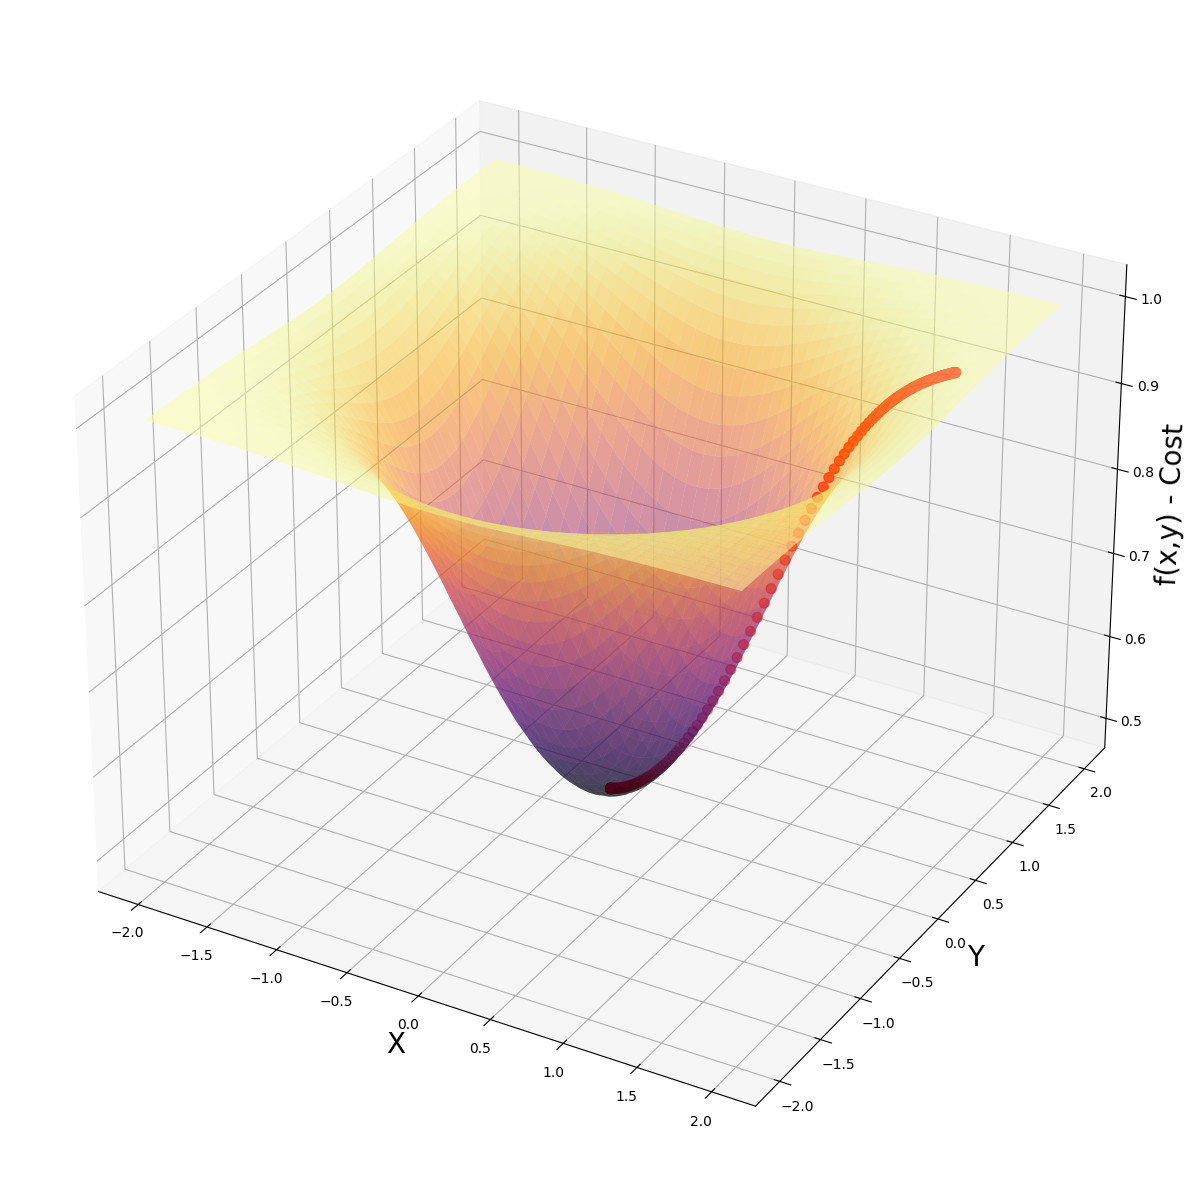

In [15]:
fig = plt.figure(figsize=(16, 12))
plt.axes(projection='3d')
ax = plt.gca()

ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x,y) - Cost", fontsize = 20)       

#
ax.plot_surface(x,y,f(x,y), cmap= cm.inferno, alpha=0.5)
ax.scatter(values_array[:,0],values_array[:,1],
            f(values_array[:,0],values_array[:,1]), s=50, color = 'red')
plt.tight_layout()
plt.show()